# Dynamic Programming I
## Fibonacci numbers

The Fibonacci numbers are defined by the recurrence relation


$${\displaystyle F_{n}=F_{n-1}+F_{n-2}},$$

where $n > 1$, $F_{0}=0$ and $F_{1}=1$. 

### Method I (top-down; simple recursion)

We first compute the $n$-th Fibonacci number using a simple recursive function.

In [1]:
def f_m1(n):
    
    assert n >= 0,"n must be non-negative"
    
    if n <= 1:
        return n
    return f_m1(n-1) + f_m1(n-2)

In [2]:
f_m1(5)

5

**Time complexity:** $\mathcal{O}(2^n)$

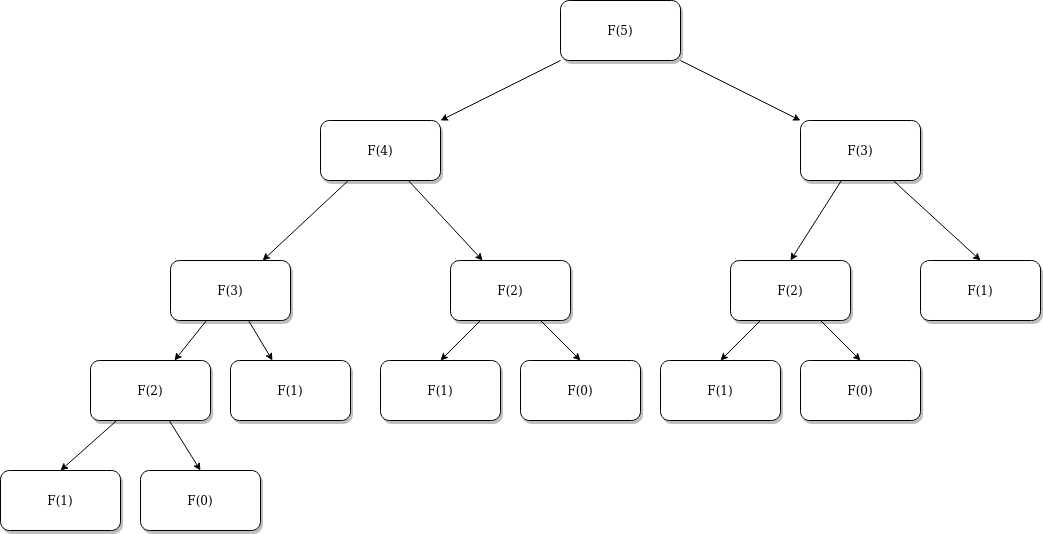
Reference: https://www.baeldung.com/wp-content/uploads/sites/4/2020/06/Fibonacci-top-down.svg

### Method II (top-down; memoization)

We now save intermediate results to avoid computing the same Fibonacci sequence elements multiple times.

In [3]:
# initialize first two Fibonacci numbers
# in memoization array

def f_m2(n,mem_arr,first_call=True):
    
    if first_call:
        mem_arr = [0, 1]
        
    #print(n,mem_arr)
    assert n >= 0,"n must be non-negative"

    if n < len(mem_arr):
        return mem_arr[n]
    else:
        f_ = f_m2(n-1,mem_arr,False)+f_m2(n-2,mem_arr,False)
        mem_arr.append(f_)
        return f_

In [4]:
mem_arr = [0, 1]

f_m2(5,mem_arr=mem_arr)

5

**Time complexity:** $\mathcal{O}(n)$

### Method III (bottom-up)

In [5]:
def f_m3(n):
    
    assert n >= 0,"n must be non-negative"
    
    # initialize first two Fibonacci numbers
    f_arr = [0, 1]
    
    for i in range(2, n+1):
        f_arr.append(f_arr[i-1] + f_arr[i-2])
    return f_arr[-1]

In [6]:
f_m3(5)

5

**Time complexity:** $\mathcal{O}(n)$

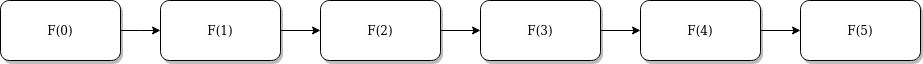
Reference: https://www.baeldung.com/wp-content/uploads/sites/4/2020/06/Fibonacci-bottom-up-1.svg

### Method IV (improved bottom-up)

In [7]:
def f_m4(n):

    assert n >= 0,"n must be non-negative"

    # initialize first two Fibonacci numbers
    x = 0
    y = 1
        
    if n == 0:
        return x
    
    elif n == 1:
        return y
    
    else:
        for i in range(2,n+1):
            z = x + y
            x = y
            y = z
        return y

In [8]:
f_m4(5)

5

**Time complexity:** $\mathcal{O}(n)$

### Runtime comparison

In [9]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
sns.set_context("talk")

In [11]:
%%capture
method_1_mean_time = []
method_1_std_time = []
method_2_mean_time = []
method_2_std_time = []
method_3_mean_time = []
method_3_std_time = []
method_4_mean_time = []
method_4_std_time = []

n_arr = np.arange(15)

for n in n_arr:
        
    func1_time = %timeit -r 5 -n 1000 -o f_m1(n)
    func2_time = %timeit -r 5 -n 1000 -o f_m2(n,mem_arr=mem_arr)
    func3_time = %timeit -r 5 -n 1000 -o f_m3(n)
    func4_time = %timeit -r 5 -n 1000 -o f_m4(n)

    method_1_mean_time.append(func1_time.average)
    method_1_std_time.append(func1_time.stdev)
    method_2_mean_time.append(func2_time.average)
    method_2_std_time.append(func2_time.stdev)
    method_3_mean_time.append(func3_time.average)
    method_3_std_time.append(func3_time.stdev)
    method_4_mean_time.append(func4_time.average)
    method_4_std_time.append(func4_time.stdev)
    
method_1_mean_time = np.array(method_1_mean_time)
method_1_std_time = np.array(method_1_std_time)
method_2_mean_time = np.array(method_2_mean_time)
method_2_std_time = np.array(method_2_std_time)
method_3_mean_time = np.array(method_3_mean_time)
method_3_std_time = np.array(method_3_std_time)
method_4_mean_time = np.array(method_4_mean_time)
method_4_std_time = np.array(method_4_std_time)

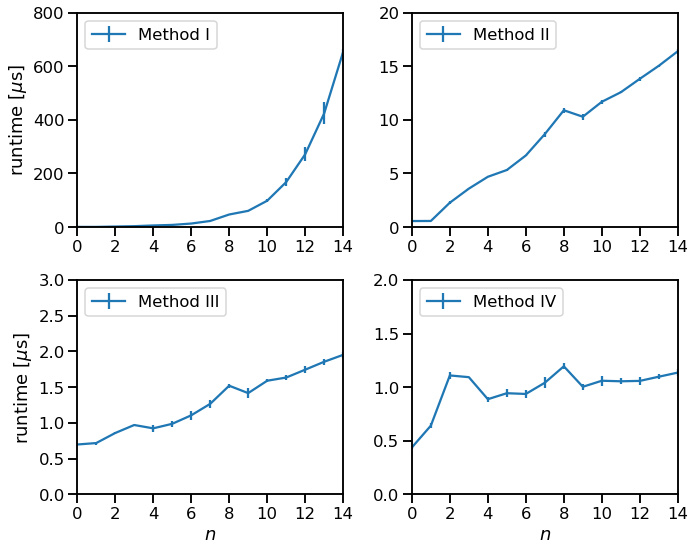

In [12]:
fig, ax = plt.subplots(ncols=2,nrows=2,figsize=(10,8))

ax[0,0].errorbar(n_arr,1e6*method_1_mean_time,yerr=1e6*method_1_std_time,label=r"Method I")
ax[0,0].set_ylabel(r"runtime [$\mu$s]")
ax[0,0].set_xlim(0,n_arr[-1])
ax[0,0].set_ylim(0,800)
ax[0,0].set_xticks(np.arange(0,15,2))
ax[0,0].legend(loc=2)

ax[0,1].errorbar(n_arr,1e6*method_2_mean_time,yerr=1e6*method_2_std_time,label=r"Method II")
ax[0,1].set_xlim(0,n_arr[-1])
ax[0,1].set_ylim(0,20)
ax[0,1].set_xticks(np.arange(0,15,2))
ax[0,1].legend(loc=2)

ax[1,0].errorbar(n_arr,1e6*method_3_mean_time,yerr=1e6*method_3_std_time,label=r"Method III")
ax[1,0].set_xlabel(r"$n$")
ax[1,0].set_ylabel(r"runtime [$\mu$s]")
ax[1,0].set_xlim(0,n_arr[-1])
ax[1,0].set_ylim(0,3)
ax[1,0].set_xticks(np.arange(0,15,2))
ax[1,0].legend(loc=2)

ax[1,1].errorbar(n_arr,1e6*method_4_mean_time,yerr=1e6*method_4_std_time,label=r"Method IV")
ax[1,1].set_xlabel(r"$n$")
ax[1,1].set_xlim(0,n_arr[-1])
ax[1,1].set_ylim(0,2)
ax[1,1].set_xticks(np.arange(0,15,2))
ax[1,1].legend(loc=2)

plt.tight_layout()
plt.show()